In [1]:
import sys
sys.path.append("..")
import TabularMethods.action_value_methods as avm
import utils
import gymnasium as gym
import torch
import random
import numpy as np

# Settings

In [2]:
ENVIRONMENT_ID = "FrozenLake-v1"
NUM_EPISODES_IN_GIFS = 10
GAMMA = 1
EPS_START = 1
EPS_END = 0.00
LEARNING_RATE = 0.1
RNG_SEED = 7
torch.manual_seed(RNG_SEED)
random.seed(RNG_SEED)

# Random agent

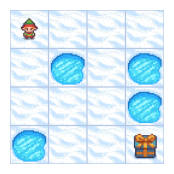

In [3]:
frames = utils.generate_random_agent_frames(ENVIRONMENT_ID, NUM_EPISODES_IN_GIFS, RNG_SEED)
utils.save_frames_as_gif(frames, "./Output/frozen_lake_random_agent.gif")

# Trained agent

Average return per episode: 0.1412


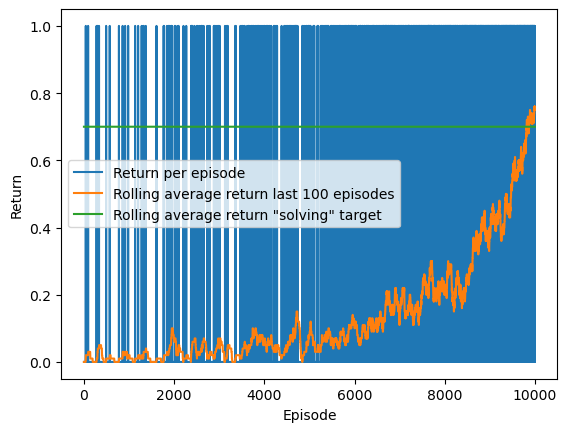

In [4]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
init_action_values = np.zeros((env.observation_space.n, env.action_space.n))
returns, Q = avm.train_episodic_sarsa(env, init_action_values, RNG_SEED, 10000, GAMMA, EPS_START, EPS_END, LEARNING_RATE)
env.close()
utils.plot_returns(returns, env.spec.reward_threshold)

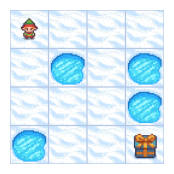

In [5]:
frames = avm.generate_frames(ENVIRONMENT_ID, NUM_EPISODES_IN_GIFS, RNG_SEED, Q)
utils.save_frames_as_gif(frames, "./Output/frozen_lake_trained_agent.gif")